# WeRateDogs Twitter Data Wrangling & Analysis

## Table of Contents

- <a href='#intro'>Introduction</a>
- <a href='#gather'>Gather</a>
- <a href='#assess'>Assess</a>
- <a href='#clean'>Clean</a>
- <a href='#storing'>Store</a>
- <a href='#analysis'>Insights and Visualization</a>
- <a href='#conclusion'>Conclusion</a>
- <a href='#sources'>Sources</a>

<a id='intro'></a>
## Introduction

WeRateDogs is a Twitter account dedicated to posting and rating dog images. These ratings are frequently superficial, with numerators bigger than denominators. I'll spend the most of this study handling WeRateDogs' Twitter history. Udacity has contributed the majority of the necessary Twitter data, which includes information on each post as well as specifics on each dog such as name, rating, and stage (whether the dog is a doggo, floofer, pupper, or puppo). The dog stages are defined further below. However, because Udacity's dataset does not contain all of the needed data, I will additionally use the Twitter API to collect extra information.


In addition, Udacity ran the images on WeRateDogs's account through a neural network to generate three predictions for each image. For each prediction, there is also data on the confidence and whether the prediction is a type of dog breed.

In the data wrangling process, I will only focus on original tweets by WeRateDogs that have ratings and images. At the end, I will also provide a brief analysis using the cleaned data. 
 In my analysis, I will provide answers to the following questiosn.
 
 - What

To begin the data wrangling process, I will import the necessary packages and also change the limit on the maximum column width.

In [34]:
#importing libraries needed for this project
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
#import re
%matplotlib inline

## DATA GATHERING
<a id='gather'></a>
### In this section, three sets of data will be gathered from the WeRateDogs twitter archive. These are:

<ol>
    <li>Twitter-archive-enhanced.csv</li>
  <li>Image_predictions and</li>
  <li>An additional data from the twiter archive</li>
    
</ol>

### Twitter-archive-enhanced.csv

First, I downloaded the Twitter archive from Udacity and will read it into a dataframe.

In [35]:
# Read the twitter-archive-enhanced.csv file into a dataframe
#Adding additional information for missing values.
missing_values ="undefined" # [“undefined”, “ ”, “none”, “-” ] 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', na_values=missing_values, encoding = 'utf-8')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**The twitter-archive-enhanced.csv was successfully imported and stored in a dataframe called twitter_archive. The dataframe consists of 17 columns with 2356 entries**

Next I will import the other two datasets.

### Importing the tweet image predictions from the udacity network server using request into a dataframe

Next I will download the dataset with the tweet images from udacity network server.

In [36]:
# Using Requests library to download a file then store it in a tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe 'images'
tweet_images = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')
# Quick check to the file content and structure
tweet_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**The tweet images was succesfully gotten from the udacity server network and stored in a dataframe called tweet_images.**

However, the two datasets does not have all the needed information for analysis, such as retweets and favourite counts. To get this data, I will have to query twitter API. However, Udacity has provide me with the JSON file, I will just import it into a dataframe. 

### Additional data from twitter API.
##### This was gotten from the link  **[tweet_jason.txt](https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt)**  and not with the twitter API as  demanded. (Note this is also allowed.)

In [38]:
list=[]
with open('tweet-json.txt', 'r') as data:
    for line in data:
        data=json.loads(line)
        
        tweet_id=data['id']
        
        created_at=data['created_at']
        
        favourite_count=data['favorite_count']
        
        retweet_count=data['retweet_count']
        
        list.append({'tweet_id':tweet_id, 
                        
                       'created_at':created_at,
                    
                       'favourite_count':favourite_count,
                    
                       'retweet_count':retweet_count})
    
tweet_json=pd.DataFrame(list, columns=['tweet_id', 'date_created', 'favourite_count', 'retweet_count'])
tweet_json.head()

,tweet_id,date_created,favourite_count,retweet_count
0,892420643555336193,NaN,39467,8853
1,892177421306343426,NaN,33819,6514
2,891815181378084864,NaN,25461,4328
3,891689557279858688,NaN,42908,8964
4,891327558926688256,NaN,41048,9774


**The additional tweet data was successfully imported and stored in a dataframe called tweet_data. The dataframe consists of 17 columns with 2356 entries**

Now that all the needed dataset has been successfully imported, next is to assess the various dataframes for quality and tidiness issues.

<a id='assess'></a>
## Assess

Now that the data is gathered, I will assess it to see what cleaning I will have to do. First I will perform a visual assessment. For this project, I need to only find 8 qality issues and 2 tidiness issues. 

> #### Assessing twitter_archive visually  

In [39]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> #### Assessing tweet_images visually 

In [40]:
#Assessing tweet_images visually
tweet_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> #### Assessing tweet_json visually 

In [41]:
tweet_json.head()

,tweet_id,date_created,favourite_count,retweet_count
0,892420643555336193,NaN,39467,8853
1,892177421306343426,NaN,33819,6514
2,891815181378084864,NaN,25461,4328
3,891689557279858688,NaN,42908,8964
4,891327558926688256,NaN,41048,9774


#### Programmatically Assessing data for quality and tidiness isssues

Getting a general overview of the twitter_archive dataframe.

In [42]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

I obsereved that, the timestamp column ought to be a datetime datatype, instead it is an object datatyp. This is a quality issue and will be addressed in the cleaning section.
 Next I will check for duplicates in the dataset. Also, there are NAN values in some of the columns. This also will be taken care of.

In [43]:
twitter_archive['tweet_id'].duplicated().sum()

0

There are no duplicates in this dataset. Next, I will further check the number of null values in each column of my dataset. 

In [44]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

I will inspect the name columns to see if there are weird or invalid dog names. But from the previous code cell, it is seen that the name column does not have an null value.

In [45]:
twitter_archive['name'].sample(10)

154        None
411        None
1142       None
143     Paisley
706      Dallas
1771      Rosie
1920      Henry
1592       None
972      Spanky
1229      Piper
Name: name, dtype: object

Even though the name column does not have a null value, after taking several samples, I discovered that there wierd and invalid 
names. next I will explore the text for each tweet_id

In [46]:
twitter_archive['text'].sample(10)

1320    This is Koda. She's a Beneboom Cumberwiggle. 1...
598     RT @dog_rates: Say hello to Jack (pronounced "...
513     PUPDATE: I've been informed that Augie was act...
886     Here's a wicked fast pupper. 12/10 camera coul...
1841    Ok, I'll admit this is a pretty adorable bunny...
309     RT @dog_rates: Meet Lola. Her hobbies include ...
1290    Please stop sending in non canines like this G...
1468    "Martha come take a look at this. I'm so fed u...
983     This is George. He just remembered that bees a...
99      Here's a very large dog. He has a date later. ...
Name: text, dtype: object

After assessing the texts for several tweet_id, I observed that, there some tweets without a dog name. This could be from retweets. When cleaning my data, I will dropp all retweeted tweets.

Furthermore, all dog names should start with a capital letter, hence I will check out all the names not starting with a capital letter.

In [47]:
twitter_archive[twitter_archive['name'].str.contains(r'^[^A-Z].*$')]['name'].value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
mad              2
not              2
getting          2
actually         2
by               1
unacceptable     1
space            1
this             1
old              1
light            1
his              1
such             1
incredibly       1
my               1
infuriating      1
officially       1
all              1
life             1
Name: name, dtype: int64

From the above code cell, it could be seen that, there are several names wich are not valid.

next, I will create a list from the above names which i will use in the cleaning section

In [48]:
def invalid(names):
    x=np.array(names)
    print(np.unique(x))
    
names=(twitter_archive[twitter_archive['name'].str.contains(r'^[^A-Z].*$')]['name']).values.tolist()
invalid_names=invalid(names)

['a' 'actually' 'all' 'an' 'by' 'getting' 'his' 'incredibly' 'infuriating'
 'just' 'life' 'light' 'mad' 'my' 'not' 'officially' 'old' 'one' 'quite'
 'space' 'such' 'the' 'this' 'unacceptable' 'very']


I will explore the texts of these names if I can find a pattern.

In [49]:
with pd.option_context('display.max_rows', None):
    print(twitter_archive[twitter_archive['name'].str.contains(r'^[^A-Z].*$')]['text'])

22      I've yet to rate a Venezuelan Hover Wiener. Th...
56      Here is a pupper approaching maximum borkdrive...
118     RT @dog_rates: We only rate dogs. This is quit...
169     We only rate dogs. This is quite clearly a smo...
193     Guys, we only rate dogs. This is quite clearly...
335     There's going to be a dog terminal at JFK Airp...
369     Occasionally, we're sent fantastic stories. Th...
542     We only rate dogs. Please stop sending in non-...
649     Here is a perfect example of someone who has t...
682     RT @dog_rates: Say hello to mad pupper. You kn...
759     RT @dog_rates: This is an East African Chalupa...
773     RT @dog_rates: We only rate dogs. Pls stop sen...
801     Guys this is getting so out of hand. We only r...
819     We only rate dogs. Pls stop sending in non-can...
822     RT @dog_rates: This is just downright precious...
852     This is my dog. Her name is Zoey. She knows I'...
924     This is one of the most inspirational stories ...
988     What j

From my inspection, it is seen that, some of these tweets does not include a dog name. others are just retweet.

**However**, it is worth noting that there are names having **None**, I will take a close look into the texts of these tweets to see if there are retweets or valid ratings.

In [50]:
twitter_archive['text'][twitter_archive['name']=='None']

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
24      You may not have known you needed to see this ...
25      This... is a Jubilant Antarctic House Bear. We...
30      @NonWhiteHat @MayhewMayhem omg hello tanner yo...
32      RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...
35      I have a new hero and his name is Howard. 14/1...
37      Here we have a corgi undercover as a malamute....
41      I present to you, Pup in Hat. Pup in Hat is gr...
42      OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...
47      Please only send dogs. We don't rate mechanics...
55      @roushfenway These are good dogs but 17/10 is ...
59      Ugh not again. We only rate dogs. Please don't...
62      Please don't send in photos without dogs in th...
64                        @RealKentMurphy 14/10 confirmed
72      Martha is stunning how h*ckin dare you. 13/10 ...
78      RT @ra

From my observations, majority of these tweets are not valid dog ratings hence I will drop them in the cleaning section.

Next, I will inspect the rating denominator to see the highest value, lowest value and see if there are invalid ratings.

In [51]:
twitter_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

It can be seen that the maximum value for the rating denominator is 170 and the minimum value is 0. This seems to be an outlier as the rating denominator should be 10. Next I will view the unique rating values

In [52]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Next I wll assess the texts associated with this ratings.

In [53]:
twitter_archive.query('rating_denominator != 10')['text']

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

Carrying out the same process for the rating numerator

In [54]:
twitter_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

The minimum value is 0 whereas the maximum value is 1776. The rating numerator should not be above 14.

In [55]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Next I will assess the rating numerator above 15 and that has their denominator as 10

In [56]:
rating_numerator_above_15 = twitter_archive.query('rating_denominator == 10 and rating_numerator > 15')[['text','rating_numerator', 'rating_denominator']]
rating_numerator_above_15

,text,rating_numerator,rating_denominator
55,@roushfenway These are good dogs but 17/10 is ...,17,10
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,@s8n You tried very hard to portray this good ...,666,10
290,@markhoppus 182/10,182,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
979,This is Atticus. He's quite simply America af....,1776,10
1712,Here we have uncovered an entire battalion of ...,26,10
2074,After so many requests... here you go.\n\nGood...,420,10


#### Next I will programmatically assess tweet_images for quality and tidiness issues

In [57]:
tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


It is seen that there are missing values here, probably some tweets must have been deleted or not found. There is nothing  that can be done here. However, there are no null values.

Next, I will check for duplicates in the dateset

In [58]:
tweet_images.duplicated().sum()

0

There are no duplicates here

In [59]:
tweet_images.tweet_id.duplicated().sum()

0

In [60]:
tweet_images.jpg_url.duplicated().sum()

66

There are lots of duplicates in the jpg_url. I will further assess them to see if there are retweets or not.

In [61]:
duplicated_jpg_url = tweet_images[tweet_images.duplicated('jpg_url')]['tweet_id']

In [62]:
twitter_archive.query('tweet_id in @duplicated_jpg_url')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: ""Good afternoon class today we'...",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,https://twitter.com/dog_rates/status/806629075...,13,10,None,None,None,None,None
211,851953902622658560,NaN,NaN,2017-04-12 00:23:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
266,841833993020538882,NaN,NaN,2017-03-15 02:10:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Ken. His cheeks are mag...,8.174239e+17,4.196984e+09,2017-01-06 17:33:29 +0000,https://twitter.com/dog_rates/status/817423860...,13,10,Ken,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
343,832040443403784192,NaN,NaN,2017-02-16 01:34:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Klein. These pics were ...,7.699404e+17,4.196984e+09,2016-08-28 16:51:16 +0000,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,None,None,None
359,829878982036299777,NaN,NaN,2017-02-10 02:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Loki. He smiles like El...,8.269587e+17,4.196984e+09,2017-02-02 01:01:21 +0000,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None


It is see that most of the duplicated jpg_urls are retweets. This will be dealt as retweets are not needed for analysis, hence all retweets id will be dropped in the cleaning section.

In [63]:
tweet_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Next I will check if there are any rows that shows there are not dogs. We do not need this in our analysis.

In [64]:
tweet_images.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


It is seen that there are rows that the predictions are not dogs. This rows will be dropped as there are not helpful to our analysis.

#### Finally, i will assess the tweet_json data for quality and tidiness issues.

In [65]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
date_created       0 non-null float64
favourite_count    2354 non-null int64
retweet_count      2354 non-null int64
dtypes: float64(1), int64(3)
memory usage: 73.6 KB


No missing values, date_created column all contains a null value and a wrong datatype. 

### ISSUES OBSERVED
After assessing the three dataframes visually and programmatically, the following issues were raise.

   **Quality Issues**<br/>
     **In twitter_archive** </br>
     
    
         1. The timestamp has wrong datatype 
         2. There are rating denominators which are not equal to 10.
         3.  Unrealistic ratings numerator      
         4. Delete columns that are retweets.
         5. Missing, invalid and wierd dog names
         6. Unnecessary columns with very low imputed data; retweeted_status_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_timestamp and retweeted_status_user_id.
        
         
   **In tweet_images** </br>
          7. Image predictions that are not dogs.
          8. Retweets column that is not needed
   **In tweet_json** </br>
       9. date_created has wrong datatype.
**Tidiness Issues**<br/>
1. The dog stage(doggo, floofer, pupper, puppo ) columns in archive dataframe can be condensed into a single column.
2. Combine all three dataframe into one.

<a id='clean'></a>
## CLEANING OF DATA

### Cleaning Data
In this section,the  focus is on cleaning **all** of the issues documented while assessing the data sets. <br/>
First, I will make copies of the datasets.


In [102]:
#Making a copy of my dataframes.
twitter_archive_copy = twitter_archive.copy()
tweet_images_copy = tweet_images.copy()
tweet_json_copy = tweet_json.copy()

**Quality Issue 1: Changing the timestamp datatype in twitter_archive.**

In [105]:
#Converting the datatype of timestamp to datetime in  twitter_archive
twitter_archive_copy['timestamp']=pd.to_datetime(twitter_archive_copy['timestamp'])

In [106]:
# Verifying that the timestamp datatype has been succesfully changed
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Quality Issue 2: Deleting rows where the rating denominator is not equal to 10**

In this section, I will drop the rows that did not have their rating denominator as 10 in the twitter_archive, they are not necessary for our analysis. 

In [107]:
#Dropping all rows where the rating numerator is not equal to 10
twitter_archive_copy=twitter_archive_copy[twitter_archive_copy['rating_denominator']==10]

In [109]:
#verifying that all rows having their rating denominator not equal to 10 has been dropped.
twitter_archive_copy.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

**Quality Issue 3: Deleting rows where the rating numerator is not realistic**

In this section, I will drop the rows that did not have a realistic rating numerator. That is all rows with rating numerator above 15.

In [110]:
#Dropping all rows where the rating numerator is greater than15
twitter_archive_copy=twitter_archive_copy[twitter_archive_copy['rating_numerator']<=15]

In [111]:
#verifying that all rows where the rating numerator greater than 15 has been dropped
twitter_archive_copy.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
7      54
14     54
5      37
6      32
3      19
4      15
2       9
1       8
15      2
0       2
Name: rating_numerator, dtype: int64

**Quality Issue 4: Delete columns that are retweet**

In this section, I will drop all rows that are retweets. First, I will convert the NAN to **not_retweet**. 

In [112]:
#changing NAN values to not_retweet
twitter_archive_copy['retweeted_status_id']=twitter_archive_copy['retweeted_status_id'].replace(np.nan, 'not_retweet');

In [113]:
#dropping all retweets.
twitter_archive_copy=twitter_archive_copy[twitter_archive_copy['retweeted_status_id']=='not_retweet']

In [115]:
#verifying that all retweets have been dropped
twitter_archive_copy.retweeted_status_id.value_counts()

not_retweet    2144
Name: retweeted_status_id, dtype: int64

**Quality Issue 5: Dropping all rows with invalid dog names dog names**

In this section, I will drop all rows that have invalid dog names. Previously, I have saved a list of all invalid names. Using that list, I will dropp such names.

In [400]:
#Invalid names. This function was declared earlier on.
invalid_names=invalid(names)

['a' 'actually' 'all' 'an' 'by' 'getting' 'his' 'incredibly' 'infuriating'
 'just' 'life' 'light' 'mad' 'my' 'not' 'officially' 'old' 'one' 'quite'
 'space' 'such' 'the' 'this' 'unacceptable' 'very']


In [116]:
#saving the invalid names from the function to a list.
name_list=['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating',
 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite',
 'space', 'such', 'the', 'this', 'unacceptable', 'very']

#Dropping all the tweets with invalid names
twitter_archive_copy=twitter_archive_copy[~twitter_archive_copy.name.isin(name_list)]

In [117]:
#Verifying that there are no more tweets with invalid names.
def invalid(names):
    x=np.array(names)
    print(np.unique(x))
    
names=(twitter_archive_copy[twitter_archive_copy['name'].str.contains(r'^[^A-Z].*$')]['name']).values.tolist()
invalid_names=invalid(names)
#invalid_names=invalid(names)

[]


Next, I will drop tweet with names as **None**

In [118]:
#Dropping tweets having None as names
index_names=twitter_archive_copy[twitter_archive_copy['name']=='None'].index

twitter2= twitter_archive_copy.drop(index_names, inplace=True)
twitter_archive_copy['text'][twitter_archive['name']=='None']

Series([], Name: text, dtype: object)

**Quality Issue 6: Dropping all invalid columns in the twitter_archive file**

In this section, I will drop all the following columns:**in_reply_to_user_id**, **retweeted_status_user_id**, **retweeted_status_user_id**, **retweeted_status_timestamp**  that are not needed for my analysis.

In [120]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [121]:
twitter_archive=twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'in_reply_to_user_id', 'retweeted_status_user_id',  'retweeted_status_timestamp'], axis=1)
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1385 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1385 non-null datetime64[ns, UTC]
source                        1385 non-null object
text                          1385 non-null object
retweeted_status_id           1385 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1385 non-null object
rating_numerator              1385 non-null int64
rating_denominator            1385 non-null int64
name                          1385 non-null object
doggo                         1385 non-null object
floofer                       1385 non-null object
pupper                        1385 non-null object
puppo                         1385 non-null object
dtypes: datetime64[ns, UT

**Quality Issue 7: Dropping rows with image predictions that are not dogs**

In this section, I will drop the rows with image predictions that are not dogs.

In [122]:
#Dropping all tweets were the image prediction is not a dog
tweet_images_copy=tweet_images_copy.query('p1_dog != False & p2_dog != False & p3_dog != False')

In [123]:
#VErifying that all tweets with false image predictions has been dropped.
tweet_images_copy.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Quality Issue 8: Dropping retweet column in **tweet_images**
This has been addressed in **Quality** **issue** **4* when all the retweets column are dropped. The next code cell validates this. 

In [124]:
twitter_archive_copy.query('tweet_id in @duplicated_jpg_url')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Quality Issue 9: Changing the datatype of date_created in tweet_json**

In [125]:
#verifying that the data type of date_created has been changed
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null int64
date_created       0 non-null float64
favourite_count    2354 non-null int64
retweet_count      2354 non-null int64
dtypes: float64(1), int64(3)
memory usage: 73.6 KB


In [127]:
#Converting the datatype of timestamp to datetime in  twitter_archive
tweet_json_copy['date_created']=pd.to_datetime(tweet_json_copy['date_created'])

**Tidiness Issue 1: Condesing doggo, floofer, pupper and puppo into one column.**


In [128]:
#Replacing None value with 0
#twitter_archive['doggo']=twitter_archive['doggo'].replace('None', 0);

#Replacing None value with 0
#twitter_archive['floofer']=twitter_archive['floofer'].replace('None', 0);

#Replacing None value with
#twitter_archive['pupper']=twitter_archive['pupper'].replace('None', 0);

#Replacing None value with 0
#twitter_archive['puppo']=twitter_archive['puppo'].replace('None', 0);

In [129]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Tidy Issue 1: Condensing the dog stages into one dog stage** <br/>
For tidiness, I will condense the various dog stages into one dog stage. 

In [132]:
#Condesing the dog stages to one column
conditions=[
    (twitter_archive_copy['doggo']=='None') & (twitter_archive_copy['floofer']=='None') & (twitter_archive_copy['pupper']=='None') & (twitter_archive_copy['puppo']=='None'),
    (twitter_archive_copy['doggo']=='doggo') & (twitter_archive_copy['floofer']=='None') & (twitter_archive_copy['pupper']=='None') & (twitter_archive_copy['puppo']=='None'),
    (twitter_archive_copy['doggo']=='None') & (twitter_archive_copy['floofer']=='floofer') & (twitter_archive_copy['pupper']=='None') & (twitter_archive_copy['puppo']=='None'),
    (twitter_archive_copy['doggo']=='None') & (twitter_archive_copy['floofer']=='None') & (twitter_archive_copy['pupper']=='pupper') & (twitter_archive_copy['puppo']=='None'),
    (twitter_archive_copy['doggo']=='None') & (twitter_archive_copy['floofer']=='None') & (twitter_archive_copy['pupper']=='None') & (twitter_archive_copy['puppo']=='puppo')
]##
choices=['No_stage', 'doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_copy['stage']=np.select(conditions, choices, default='multiple_naming')


In [134]:
#Testing to see if the process was fine
twitter_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,No_stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,No_stage
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,No_stage
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,No_stage
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,No_stage
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,not_retweet,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,No_stage
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,No_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None,No_stage
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None,No_stage


Next, I will convert twitter_archive into a dataframe again from. 

In [135]:
#Next, i will convert the numpy array into a pandas dataframe
twitter_archive_copy=pd.DataFrame(twitter_archive_copy)
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,No_stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,No_stage
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,No_stage
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,No_stage
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,No_stage


In [136]:
twitter_archive_copy['stage'].value_counts()

No_stage           1202
pupper              120
doggo                38
puppo                16
floofer               5
multiple_naming       4
Name: stage, dtype: int64

Finally, I will drop the various dog stages as I do no longer need them.

In [137]:
#Dropping dog stages
twitter_archive_copy=twitter_archive_copy.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1)

In [138]:
twitter_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,No_stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,No_stage
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,No_stage
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,No_stage
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,not_retweet,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,No_stage


**Tidy Issue 2: Finally, I will merge all three dataframes into one dataset** <br/>

In [139]:
#Merging into a master dataframe.
twitter_merge=pd.merge(pd.merge(twitter_archive_copy, tweet_images_copy, on='tweet_id'), tweet_json_copy, on='tweet_id')
twitter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 848
Data columns (total 28 columns):
tweet_id                      849 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     849 non-null datetime64[ns, UTC]
source                        849 non-null object
text                          849 non-null object
retweeted_status_id           849 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 849 non-null object
rating_numerator              849 non-null int64
rating_denominator            849 non-null int64
name                          849 non-null object
stage                         849 non-null object
jpg_url                       849 non-null object
img_num                       849 non-null int64
p1                            849 non-null object
p1_conf                       849 non-nul

Finally, I will ensure all NAN values are removed as I have not done sor for each of the dataset earlier.

In [420]:
twitter_merge=twitter_merge.fillna(0)
twitter_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 848
Data columns (total 24 columns):
tweet_id               849 non-null int64
timestamp              849 non-null datetime64[ns, UTC]
source                 849 non-null object
text                   849 non-null object
retweeted_status_id    849 non-null object
expanded_urls          849 non-null object
rating_numerator       849 non-null int64
rating_denominator     849 non-null int64
name                   849 non-null object
stage                  849 non-null object
jpg_url                849 non-null object
img_num                849 non-null int64
p1                     849 non-null object
p1_conf                849 non-null float64
p1_dog                 849 non-null bool
p2                     849 non-null object
p2_conf                849 non-null float64
p2_dog                 849 non-null bool
p3                     849 non-null object
p3_conf                849 non-null float64
p3_dog                 849 

<a id='storing'></a> 
# Storing the data

In [421]:
#Saving the merged dataframe into a master csv file.
twitter_archive_master=twitter_merge.to_csv('twitter_archive_master.csv')
twitter_archive_master=twitter_merge

<a id='analysis'></a> 
# Analyzing the data to obtain at least 3 insights and one visualization

### Insigth One.
The most frequent dog breed based on the three prediction algorithms?

In [422]:
# Top 10 most frequent p1 dog breed predictions 
p1_data=twitter_archive_master.p1.value_counts().nlargest(10)
print(p1_data)

golden_retriever      76
Pembroke              56
Labrador_retriever    50
Chihuahua             38
pug                   26
toy_poodle            20
Pomeranian            20
malamute              19
chow                  18
French_bulldog        17
Name: p1, dtype: int64


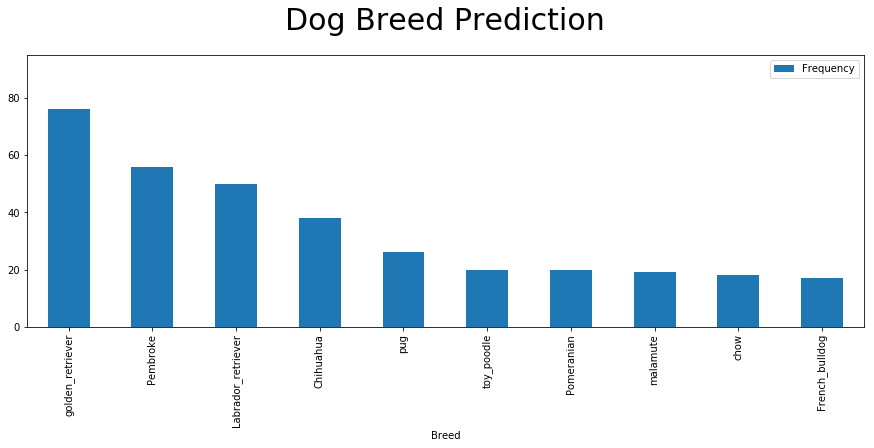

In [423]:
p1_plot=p1_data.plot.bar(x='Dog Breed', y='number of dogs', figsize=(15,5));
plt.ylim(top=95)
plt.title("Dog Breed Prediction",{'fontsize': 30},pad=25)
plt.xlabel("Breed")
plt.legend(["Frequency"]);

In [424]:
# Top 10 most frequent p1 dog breed predictions 
p2_data= twitter_archive_master.p2.value_counts().nlargest(10)
print(p2_data)

Cardigan                    46
Labrador_retriever          46
golden_retriever            40
French_bulldog              21
miniature_poodle            20
collie                      20
toy_poodle                  19
Eskimo_dog                  19
Chihuahua                   19
Chesapeake_Bay_retriever    19
Name: p2, dtype: int64


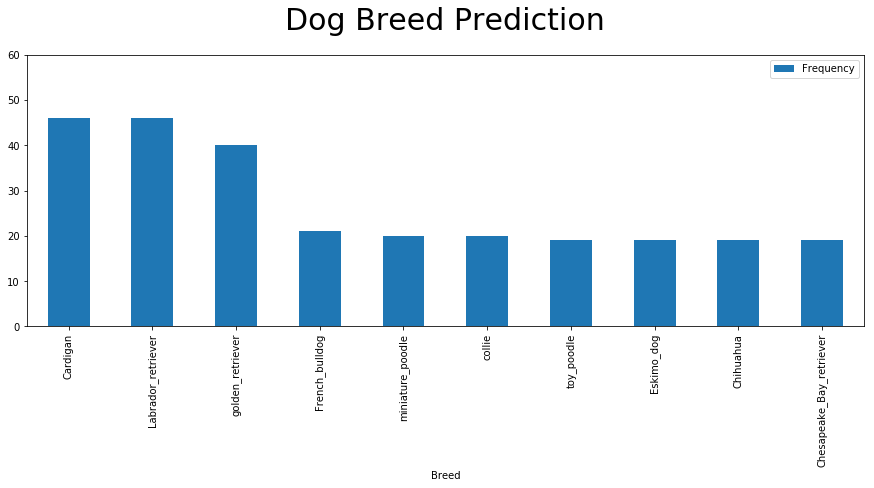

In [425]:
p2_plot=p2_data.plot.bar(x='Dog Breed', y='number of dogs', figsize=(15,5));
plt.ylim(top=60)
plt.title("Dog Breed Prediction",{'fontsize': 30},pad=25)
plt.xlabel("Breed")
plt.legend(["Frequency"]);

In [426]:
# Top 10 most frequent p1 dog breed predictions 
p3_data=twitter_archive_master.p3.value_counts().nlargest(10)
print(p3_data)

Labrador_retriever           45
Chihuahua                    37
kelpie                       24
beagle                       20
golden_retriever             20
Pekinese                     20
malamute                     19
Chesapeake_Bay_retriever     19
Eskimo_dog                   19
Staffordshire_bullterrier    19
Name: p3, dtype: int64


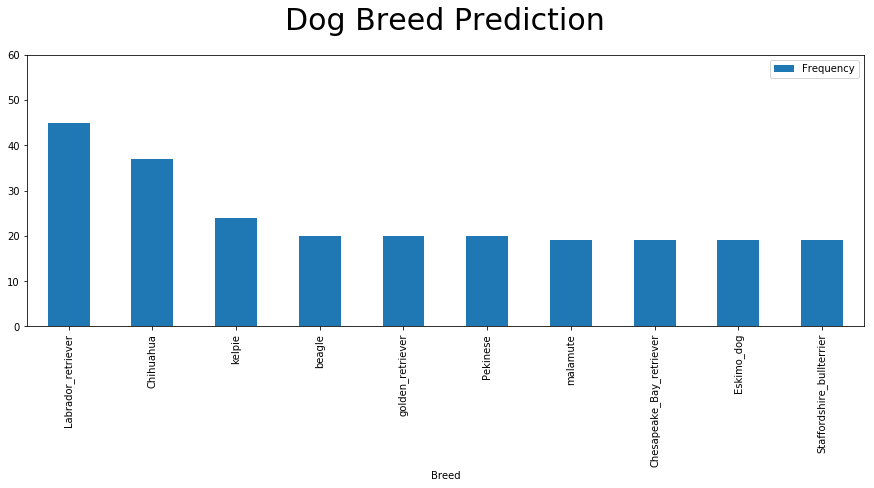

In [427]:
p3_plot=p3_data.plot.bar(x='Dog Breed', y='number of dogs', figsize=(15,5));
plt.ylim(top=60)
plt.title("Dog Breed Prediction",{'fontsize': 30},pad=25)
plt.xlabel("Breed")
plt.legend(["Frequency"]);

### From my analysis,
**golden_retriever** is the most frequent prediction for a given dog based on the first (p1) algorithm.<br/>
Whereas **Labrador_retriever** is the most frequent prediction for a given dog based on the second (p2) and third(p3) algorithm. <br/>
A plot of these insights are given below

### Insight 2: The most popular dog name
The most popular dog name will be analyzed and visualized. I will get the ten most popular name.

In [428]:
twitter_archive_master.name.value_counts()

Cooper       9
Charlie      8
Oliver       7
Sadie        6
Koda         6
Bo           5
Tucker       5
Winston      5
Toby         5
Lucy         5
Leo          5
Dave         4
Gus          4
Daisy        4
Scooter      4
Larry        4
Stanley      4
Reggie       4
Bear         4
Oscar        4
Finn         4
Maggie       4
Rosie        3
Louis        3
Olive        3
Scout        3
Wilson       3
Duke         3
Dexter       3
Sophie       3
            ..
Laela        1
Jamesy       1
Vince        1
Kial         1
Katie        1
Dug          1
Maxaroni     1
Rinna        1
Maisey       1
Mac          1
Billy        1
Belle        1
Willow       1
Ito          1
Doc          1
Evy          1
Pumpkin      1
Bell         1
Sundance     1
Kramer       1
Sampson      1
Grizzwald    1
Pancake      1
Tug          1
Vincent      1
Walter       1
Luna         1
Gerald       1
Tyrone       1
Lorelei      1
Name: name, Length: 630, dtype: int64

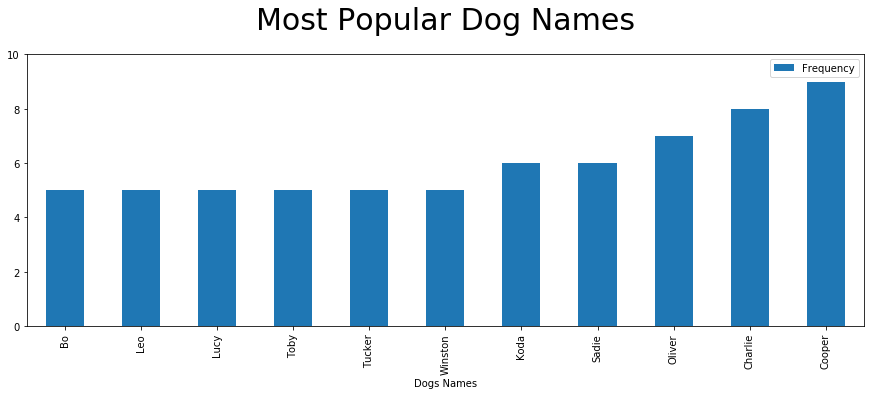

In [433]:
named_dogs = twitter_archive_master.query('name == name')
named_dogs_grouped = named_dogs.groupby('name').count()[['tweet_id']]
named_dogs_grouped.rename(columns={'tweet_id':'name_count'}, inplace=True)
named_dogs_grouped.query('name_count >= 5').sort_values(by=['name_count']).plot.bar(figsize=(15, 5))
plt.ylim(top=10)
plt.title("Most Popular Dog Names",{'fontsize': 30},pad=25)
plt.xlabel("Dogs Names")
plt.legend(["Frequency"]);

The most popular dog name is Cooper, followed by Charlie and then Oliver

### Insight 3: The dog breed with the most and least favourite count using the most likely dog prediction (p1)

In [434]:
#Getting the number of favourite counts for each do breed.
occur = twitter_archive_master.groupby([ 'p1', 'favourite_count']).size()
newdf=pd.DataFrame(occur)
newdf.head(100)

0
p1                             favourite_count   
Afghan_hound                   7078             1
                               17305            1
Airedale                       1047             1
                               1425             1
                               2378             1
                               2593             1
                               3469             1
                               3804             1
                               5177             1
                               12595            1
                               22036            1
American_Staffordshire_terrier 1273             1
                               2434             1
                               2887             1
                               3410             1
                               5407             1
                               5927             1
                               8112             1
                               11411            1
                               13256            1
                               23074            1
Australian_terrier             2244             1
                               20011            1
Bedlington_terrier             13864            1
                               24678            1
Bernese_mountain_dog           1514             1
                               2698             1
                               2890             1
                               4489             1
                               5498             1
...                                            ..
Cardigan                       7457             1
                               7878             1
                               8564             1
                               10606            1
                               15817            1
                               18423            1
                               32651            1
                               35501            1
                               37744            1
Chesapeake_Bay_retriever       227              1
                               1032             1
                               2545             1
                               3084             1
                               4026             1
                               6339             1
                               7620             1
                               8033             1
                               9112             1
                               20950            1
                               27530            1
                               71144            1
Chihuahua                      248              1
                               349              1
                               425              1
                               731              1
                               750              1
                               788              1
                               1056             1
                               1096             1
                               1530             1

[100 rows x 1 columns]

In [435]:
#From the dataframe created, summing the favourite count for each dog bree
total_favCount=twitter_archive_master.groupby(['p1'], as_index=False)['favourite_count'].sum()
total_favCount.set_index('p1', inplace=True)
total_favCount

,favourite_count
p1,
Afghan_hound,24383
Airedale,54524
American_Staffordshire_terrier,77191
Australian_terrier,22255
Bedlington_terrier,38542
Bernese_mountain_dog,67771
Blenheim_spaniel,57803
Border_collie,77722
Border_terrier,93185


In [436]:
#The ten highest rated dog breed based on favourite count
total_favCount.nlargest(10, ['favourite_count'])

,favourite_count
p1,
golden_retriever,1068148
Pembroke,686962
Labrador_retriever,564482
Chihuahua,373671
French_bulldog,351788
Samoyed,230818
cocker_spaniel,210977
toy_poodle,202962
malamute,186758


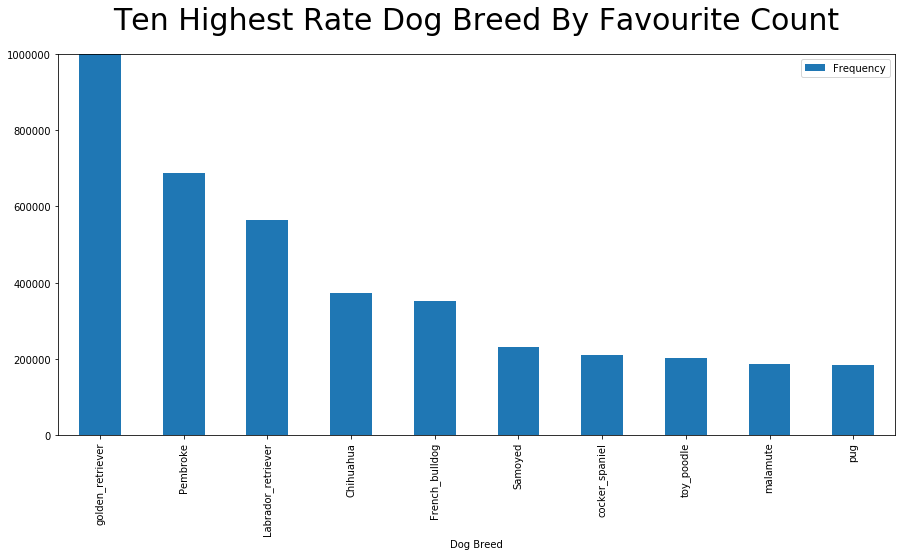

In [437]:
#plotting the ten highest rated dog breed based on favourite count
total_favCount.nlargest(10, ['favourite_count']).plot.bar(figsize=(15, 7))
plt.ylim(top=1000009)
plt.title("Ten Highest Rate Dog Breed By Favourite Count",{'fontsize': 30},pad=25)
plt.xlabel("Dog Breed")
plt.legend(["Frequency"]);

The most rated dog breed is **golden retriever**, followed by **labrador retriever**

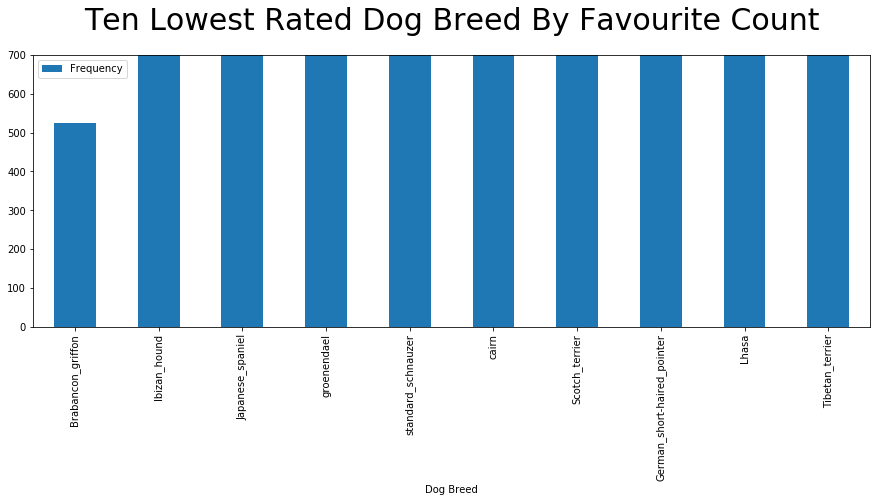

In [438]:
#plotting the ten loweshighest rated dog breed based on favourite count
total_favCount.nsmallest(10, ['favourite_count']).plot.bar(figsize=(15, 5))
plt.ylim(top=700)
plt.title("Ten Lowest Rated Dog Breed By Favourite Count",{'fontsize': 30},pad=25)
plt.xlabel("Dog Breed")
plt.legend(["Frequency"]);

The least rated dog breed is the **crash helemt** followed by **leatherback turtle**

<a id='conclusion'></a> 
# Conclusion
Find attached copy for final report of this work 

<a id='sources'></a>
## Sources

- [We rate dogs project](https://www.kaggle.com/code/msytnadeem/weratedogs-tweet-data-wrangling)
- [We rate dogs project](https://github.com/evanchen13/weratedogs/blob/master/wrangle_act.ipynb)
- [Drop rows based on certain conditions](https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/)
- [How to find the ten smallest and larest value in pandas](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html)

In [140]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'project/wrangle_act.html'])

4294967295